In [126]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import warnings
import matplotlib.pyplot as plt
import seaborn as sns

In [127]:
warnings.filterwarnings('ignore')

In [128]:
orders = pd.read_csv('olist_orders_dataset.csv')

In [129]:
order_item = pd.read_csv('olist_order_items_dataset.csv')

In [130]:
product = pd.read_csv('olist_products_dataset.csv')

In [131]:
category = pd.read_csv('product_category_name_translation.csv')

In [132]:
sellers = pd.read_csv('olist_sellers_dataset.csv')

In [133]:
customers = pd.read_csv('olist_customers_dataset.csv')

In [134]:
location = pd.read_csv('olist_geolocation_dataset.csv')

### Product clustering

In [135]:
product_modified = product.dropna(inplace= False)
product_X = product_modified.drop(columns= ['product_category_name','product_id'])
X_std = StandardScaler().fit_transform(product_X)
X_std_df = pd.DataFrame(X_std)

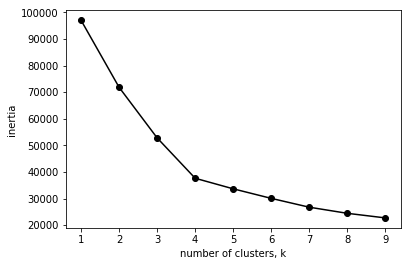

In [136]:
ks = range(1, 10)
inertias = []
for k in ks:
    # Create a KMeans instance with k clusters: model
    model = KMeans(n_clusters=k)
    
    # Fit model to samples
    model.fit(X_std_df.iloc[:,:3])
    
    # Append the inertia to the list of inertias
    inertias.append(model.inertia_)
    
plt.plot(ks, inertias, '-o', color='black')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()

In [137]:
#perform Clustering
kmeans = KMeans(n_clusters=4) 
kmeans.fit(X_std_df)
y_kmeans = kmeans.predict(X_std_df)

In [138]:
kmeans_df = pd.DataFrame({'Clusters':y_kmeans})
df_clusters = pd.concat([product_modified, kmeans_df], axis= 1)
df_clusters.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,Clusters
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0,1.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0,1.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0,1.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0,1.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0,1.0


In [139]:
df_clusters = df_clusters.groupby('Clusters').mean()
df_clusters

,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
Clusters,,,,,,,
0.0,48.665272,758.963682,2.151632,2275.659582,31.042510,16.951464,23.269791
1.0,48.432676,773.823328,2.189537,2280.303908,30.793556,16.934330,23.086743
2.0,48.663187,770.678620,2.199728,2217.831593,30.721289,16.971403,23.511121
3.0,48.384498,776.177812,2.215115,2314.099475,30.893617,17.061067,23.330064


In [140]:
# Create a PCA instance: pca
pca = PCA(n_components=7)
principalComponents = pca.fit_transform(X_std)
# Save components to a DataFrame
PCA_components = pd.DataFrame(principalComponents)

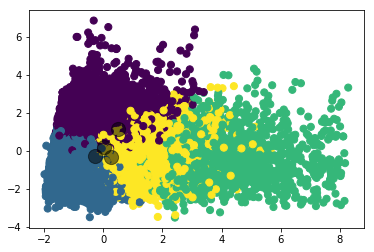

In [142]:
plt.scatter(PCA_components.iloc[:, 0], PCA_components.iloc[:, 1], c=y_kmeans, s=50, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);

In [144]:
order_item_combined = pd.merge(orders, order_item, how = "left", left_on = "order_id", right_on = "order_id")
order_item_combined.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1.0,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,1.0,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,2018-07-30 03:24:27,118.70,22.76
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,1.0,aa4383b373c6aca5d8797843e5594415,4869f7a5dfa277a7dca6462dcf3b52b2,2018-08-13 08:55:23,159.90,19.22
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00,1.0,d0b61bfb1de832b15ba9d266ca96e5b0,66922902710d126a0e7d26b0e3805106,2017-11-23 19:45:59,45.00,27.20
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00,1.0,65266b2da20d04dbe00c5c2d3bb7859e,2c9e548be18521d1c43cde1c582c6de8,2018-02-19 20:31:37,19.90,8.72


In [145]:
order_item_combined['order_purchase_timestamp'] = pd.to_datetime(order_item_combined['order_purchase_timestamp'])
order_item_combined['order_delivered_customer_date'] = pd.to_datetime(order_item_combined['order_delivered_customer_date'])
order_item_combined['delivery_time'] = order_item_combined['order_delivered_customer_date'] - order_item_combined['order_purchase_timestamp']
order_item_combined['delivery_time'] =order_item_combined['delivery_time'] / np.timedelta64(1, 'D')


In [146]:
order_item_combined['order_purchase_timestamp'] = pd.to_datetime(order_item_combined['order_purchase_timestamp'])
order_item_combined['order_estimated_delivery_date'] = pd.to_datetime(order_item_combined['order_estimated_delivery_date'])
order_item_combined['estimated_delivery_time'] = order_item_combined['order_estimated_delivery_date'] - order_item_combined['order_purchase_timestamp']
order_item_combined['estimated_delivery_time'] =order_item_combined['estimated_delivery_time'] / np.timedelta64(1, 'D')

In [147]:
order_item_combined['order_purchase_timestamp'] = pd.to_datetime(order_item_combined['order_purchase_timestamp'])
order_item_combined['date_today'] = pd.datetime.now()
order_item_combined['time_since_order'] = order_item_combined['date_today'] - order_item_combined['order_delivered_customer_date'] 
order_item_combined['time_since_order'] =order_item_combined['time_since_order'] / np.timedelta64(1, 'D')

In [148]:
order_item_combined.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,delivery_time,estimated_delivery_time,date_today,time_since_order
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,1.0,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,8.436574,15.544063,2019-11-21 10:43:47.371014,771.554564
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,1.0,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,2018-07-30 03:24:27,118.70,22.76,13.782037,19.137766,2019-11-21 10:43:47.371014,470.802805
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,1.0,aa4383b373c6aca5d8797843e5594415,4869f7a5dfa277a7dca6462dcf3b52b2,2018-08-13 08:55:23,159.90,19.22,9.394213,26.639711,2019-11-21 10:43:47.371014,460.692574
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,1.0,d0b61bfb1de832b15ba9d266ca96e5b0,66922902710d126a0e7d26b0e3805106,2017-11-23 19:45:59,45.00,27.20,13.208750,26.188819,2019-11-21 10:43:47.371014,719.427145
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,1.0,65266b2da20d04dbe00c5c2d3bb7859e,2c9e548be18521d1c43cde1c582c6de8,2018-02-19 20:31:37,19.90,8.72,2.873877,12.112049,2019-11-21 10:43:47.371014,642.685247


In [149]:
seller_data = order_item_combined.groupby('seller_id').agg({'order_id': 'count', 
                                                            'price': 'sum', 
                                                            'delivery_time': 'mean',
                                                            'time_since_order': ['min','max'],
                                                             'freight_value': 'mean'}).reset_index()

In [150]:
seller_data.head()

seller_id order_id     price delivery_time  \
                                       count       sum          mean   
0  0015a82c2db000af6aaaf3ae2ecb0532        3   2685.00     10.793885   
1  001cca7ae9ae17fb1caed9dfb1094831      239  25080.03     13.096632   
2  001e6ad469a905060d959994f1b41e4f        1    250.00           NaN   
3  002100f778ceb8431b7a1020ff7ab48f       55   1234.50     16.192371   
4  003554e2dce176b5555353e4f3555ac8        1    120.00      4.646806   

  time_since_order              freight_value  
               min          max          mean  
0       754.748407   774.771532     21.020000  
1       488.718974  1001.055444     37.046611  
2              NaN          NaN     17.940000  
3       580.558801   790.674750     14.430182  
4       701.513870   701.513870     19.380000

In [173]:
# seller_data.to_csv("seller_grp.csv")

seller_data = pd.read_csv('seller_grp.csv')

### sellers clustering

In [174]:
seller_data.describe()

,no_of_orders,Total_sales,mean_delivery_time,time_since_last_order,time_since_first_order,freight_value
count,3095.000000,3095.000000,2970.000000,2970.000000,2970.000000,3095.000000
mean,36.397415,4391.484233,12.165489,566.776675,746.310810,23.380116
std,119.193461,13921.997192,7.104826,160.187735,196.739975,18.957766
min,1.000000,3.500000,1.214178,399.886782,434.600069,1.200000
25%,2.000000,208.850000,8.294135,453.723156,566.706701,14.740000
50%,8.000000,821.480000,11.123534,481.742361,729.618646,18.230000
75%,24.000000,3280.830000,14.241718,632.771930,923.997199,24.368333
max,2033.000000,229472.630000,189.863160,1133.788044,1135.870277,308.336667


In [175]:
seller_modified = seller_data.dropna(inplace= False)

In [176]:
seller_modified.head()

,seller_id,no_of_orders,Total_sales,mean_delivery_time,time_since_last_order,time_since_first_order,freight_value
0,0015a82c2db000af6aaaf3ae2ecb0532,3,2685.00,10.793885,754.745590,774.768715,21.020000
1,001cca7ae9ae17fb1caed9dfb1094831,239,25080.03,13.096632,488.716157,1001.052627,37.046611
3,002100f778ceb8431b7a1020ff7ab48f,55,1234.50,16.192371,580.555984,790.671933,14.430182
4,003554e2dce176b5555353e4f3555ac8,1,120.00,4.646806,701.511053,701.511053,19.380000
5,004c9cd9d87a3c30c522c48c4fc07416,170,19712.71,14.430364,543.882025,1017.822407,20.889588


In [177]:
seller_X = seller_modified.drop(columns= ['seller_id'])
X_std_seller = StandardScaler().fit_transform(seller_X)
X_std_seller_df = pd.DataFrame(X_std_seller)

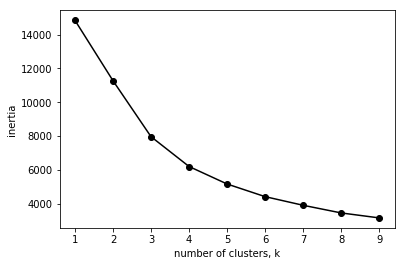

In [178]:
ks = range(1, 10)
inertias = []
for k in ks:
    # Create a KMeans instance with k clusters: model
    model = KMeans(n_clusters=k)
    
    # Fit model to samples
    model.fit(X_std_seller_df.iloc[:,:5])
    
    # Append the inertia to the list of inertias
    inertias.append(model.inertia_)
    
plt.plot(ks, inertias, '-o', color='black')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()

In [179]:
#perform Clustering
kmeans = KMeans(n_clusters=2) 
kmeans.fit(X_std_seller_df)
y_kmeans = kmeans.predict(X_std_seller_df)

In [180]:
kmeans_df = pd.DataFrame({'Clusters':y_kmeans})
df_seller_cluster = pd.concat([seller_modified, kmeans_df], axis= 1)
#df_seller_cluster

In [188]:
#seller_modified
#df_seller_cluster

In [182]:
#kmeans_df

In [183]:
df_clusters = df_seller_cluster.groupby('Clusters').mean().reset_index()
df_clusters

,Clusters,no_of_orders,Total_sales,mean_delivery_time,time_since_last_order,time_since_first_order,freight_value
0,0.0,25.375000,3320.933333,11.423657,558.331097,719.730770,21.961626
1,1.0,37.918346,4503.477480,12.206967,566.209869,744.756366,23.315673


In [196]:
df_clusters_entire = df_seller_cluster.mean().reset_index()
df_clusters_entire

,index,0
0,no_of_orders,37.859933
1,Total_sales,4566.515906
2,mean_delivery_time,12.165489
3,time_since_last_order,566.776675
4,time_since_first_order,746.310810
5,freight_value,23.316930
6,Clusters,0.991919


In [184]:
# Create a PCA instance: pca
pca = PCA(n_components=6)
principalComponents = pca.fit_transform(X_std_seller)
# Save components to a DataFrame
PCA_components = pd.DataFrame(principalComponents)

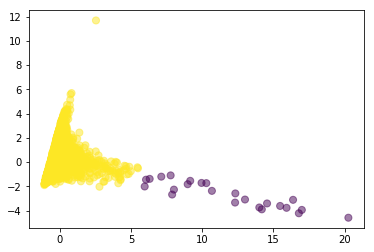

In [197]:
plt.scatter(PCA_components.iloc[:, 0], PCA_components.iloc[:, 1], c=y_kmeans, s=50, alpha =0.5, cmap='viridis')

centers = kmeans.cluster_centers_
#plt.scatter(centers[:, 0], centers[:, 1], c='red', s=20, alpha=0.9);

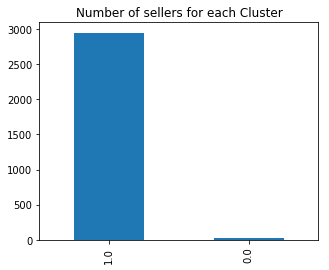

In [205]:
#df_clusters['Clusters'].value_counts()
ax = df_seller_cluster['Clusters'].value_counts()
ax.plot(kind='bar',figsize=(5,4),title="Number of sellers for each Cluster")

### RFM (Recency, Fequency, Monetary) Analysis

In [37]:
seller_data_rfm = seller_modified[['seller_id','totalOrders','totalSales','TimeSinceLastOrder']]

In [38]:
seller_X = seller_data_rfm.drop(columns= ['seller_id'])
X_std_seller = StandardScaler().fit_transform(seller_X)
X_std_seller_df = pd.DataFrame(X_std_seller)

In [39]:
#perform Clustering
kmeans = KMeans(n_clusters=3) 
kmeans.fit(X_std_seller_df)
y_kmeans = kmeans.predict(X_std_seller_df)

In [40]:
kmeans_df = pd.DataFrame({'Clusters':y_kmeans})
df_seller_cluster = pd.concat([seller_data_rfm, kmeans_df], axis= 1)

In [41]:
df_clusters = df_seller_cluster.groupby('Clusters').mean().reset_index()
df_clusters

,Clusters,totalOrders,totalSales,TimeSinceLastOrder
0,0.0,38.551312,4602.761509,-560.603778
1,1.0,21.761905,2908.326190,-559.419197
2,2.0,35.889226,4183.861275,-558.567346


In [42]:
# Create a PCA instance: pca
pca = PCA(n_components=3)
principalComponents = pca.fit_transform(X_std_seller)
# Save components to a DataFrame
PCA_components = pd.DataFrame(principalComponents)

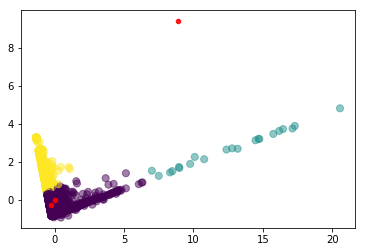

In [43]:
plt.scatter(PCA_components.iloc[:, 0], PCA_components.iloc[:, 1], c=y_kmeans, s=50, alpha =0.5, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=20, alpha=0.9);

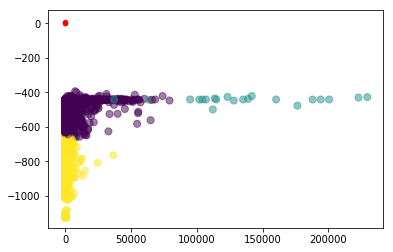

In [44]:
plt.scatter(seller_X.iloc[:, 1], seller_X.iloc[:, 2], c=y_kmeans, s=50, alpha =0.5, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=20, alpha=0.9);